2024-05-20 20:33:43.863141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-20 20:33:52.655209: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1/25, Loss: 2.146, Accuracy: 0.232, Val_Loss: 2.145, Val_Accuracy: 0.235
Epoch 2/25, Loss: 2.018, Accuracy: 0.323, Val_Loss: 2.061, Val_Accuracy: 0.305
Epoch 3/25, Loss: 1.646, Accuracy: 0.439, Val_Loss: 1.717, Val_Accuracy: 0.419
Epoch 4/25, Loss: 1.404, Accuracy: 0.526, Val_Loss: 1.502, Val_Accuracy: 0.498
Epoch 5/25, Loss: 1.246, Accuracy: 0.595, Val_Loss: 1.347, Val_Accuracy: 0.565
Epoch 6/25, Loss: 1.135, Accuracy: 0.640, Val_Loss: 1.238, Val_Accuracy: 0.608
Epoch 7/25, Loss: 1.083, Accuracy: 0.659, Val_Loss: 1.188, Val_Accuracy: 0.633
Epoch 8/25, Loss: 1.022, Accuracy: 0.679, Val_Loss: 1.132, Val_Accuracy: 0.651
Epoch 9/25, Loss: 0.991, Accuracy: 0.690, Val_Loss: 1.102, Val_Accuracy: 0.662
Epoch 10/25, Loss: 0.945, Accuracy: 0.706, Val_Loss: 1.061, Val_Accuracy: 0.678
Epoch 11/25, Loss: 0.872, Accuracy: 0.733, Val_Loss: 0.995, Val_Accuracy: 0.699
Epoch 12/25, Loss: 0.857, Accuracy: 0.737, Val_Loss: 0.987, Val_Accuracy: 0.702
Epoch 13/25, Loss: 0.855, Accuracy: 0.736, Val_Lo

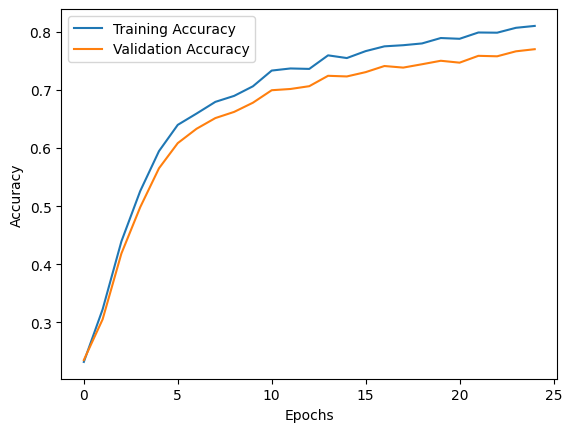

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# завантажуємо датасет
ds_train, ds_info_train = tfds.load('svhn_cropped', split='train', as_supervised=True, with_info=True)
ds_test, ds_info_test = tfds.load('svhn_cropped', split='test', as_supervised=True, with_info=True)

# Преобразование TensorFlow Dataset в NumPy arrays
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for image, label in dataset:
        images.append(image.numpy())
        labels.append(label.numpy())
    return np.array(images), np.array(labels)

# Завантаження даних в NumPy arrays
X_train, y_train = dataset_to_numpy(ds_train)
X_test, y_test = dataset_to_numpy(ds_test)

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Перетворення міток класів в one-hot encoding
def to_categorical(y, num_classes):
    return np.eye(num_classes)[y]

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


class NeuralNetwork:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, output_size):
        self.W1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_size1))
        self.W2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
        self.b2 = np.zeros((1, hidden_size2))
        self.W3 = np.random.randn(hidden_size2, hidden_size3) / np.sqrt(hidden_size2)
        self.b3 = np.zeros((1, hidden_size3))
        self.W4 = np.random.randn(hidden_size3, hidden_size4) / np.sqrt(hidden_size3)
        self.b4 = np.zeros((1, hidden_size4))
        self.W5 = np.random.randn(hidden_size4, output_size) / np.sqrt(hidden_size4)
        self.b5 = np.zeros((1, output_size))

    def forward_propagation(self, X): # пряме поширення
        X = X.reshape(X.shape[0], -1)
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.maximum(0, self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = np.maximum(0, self.z2)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = np.maximum(0, self.z3)
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.a4 = np.maximum(0, self.z4)
        self.z5 = np.dot(self.a4, self.W5) + self.b5
        self.z5 -= np.max(self.z5, axis=1, keepdims=True)
        self.a5 = np.exp(self.z5) / np.sum(np.exp(self.z5), axis=1, keepdims=True)
        return self.a5

    def backward_propagation(self, X, y): # Зворотне поширення
        m = X.shape[0]
        delta5 = self.a5 - y
        self.dW5 = np.dot(self.a4.T, delta5) / m
        self.db5 = np.sum(delta5, axis=0, keepdims=True) / m

        delta4 = np.dot(delta5, self.W5.T) * np.where(self.a4 > 0, 1, 0)
        self.dW4 = np.dot(self.a3.T, delta4) / m
        self.db4 = np.sum(delta4, axis=0, keepdims=True) / m

        delta3 = np.dot(delta4, self.W4.T) * np.where(self.a3 > 0, 1, 0)
        self.dW3 = np.dot(self.a2.T, delta3) / m
        self.db3 = np.sum(delta3, axis=0, keepdims=True) / m

        delta2 = np.dot(delta3, self.W3.T) * np.where(self.a2 > 0, 1, 0)
        self.dW2 = np.dot(self.a1.T, delta2) / m
        self.db2 = np.sum(delta2, axis=0, keepdims=True) / m

        delta1 = np.dot(delta2, self.W2.T) * np.where(self.a1 > 0, 1, 0)
        self.dW1 = np.dot(X.reshape(X.shape[0], -1).T, delta1) / m
        self.db1 = np.sum(delta1, axis=0, keepdims=True) / m

    def update_param(self, learning_rate):
        # Оновлення вагів і зсувів для всіх шарів
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2
        self.W3 -= learning_rate * self.dW3
        self.b3 -= learning_rate * self.db3
        self.W4 -= learning_rate * self.dW4
        self.b4 -= learning_rate * self.db4
        self.W5 -= learning_rate * self.dW5
        self.b5 -= learning_rate * self.db5

    def train(self, X, y, epochs, learning_rate, X_val, y_val, batch_size=64): # Тренування
        train_accuracies = []
        val_accuracies = []
        
        for epoch in range(epochs): # епохи
            for i in range(0, X.shape[0], batch_size): # батчі
                batch_X = X[i:i + batch_size]  # Виділяємо батч з X
                batch_y = y[i:i + batch_size]
                self.forward_propagation(batch_X)
                self.backward_propagation(batch_X, batch_y)
                self.update_param(learning_rate)
            train_loss, train_accuracy = self.evaluate(X, y)
            val_loss, val_accuracy = self.evaluate(X_val, y_val)
            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {train_loss:.3f}, Accuracy: {train_accuracy:.3f}, Val_Loss: {val_loss:.3f}, Val_Accuracy: {val_accuracy:.3f}")
        
        return train_accuracies, val_accuracies

    def evaluate(self, X, y): # Ф-ція для перевірки
        predictions = self.forward_propagation(X)
        loss = -np.sum(y * np.log(predictions)) / len(y) # обчислення втрат
        accuracy = np.mean(np.argmax(predictions, axis=1) == np.argmax(y, axis=1)) # обчислення точності
        return loss, accuracy


model = NeuralNetwork(3072, 512, 256, 128, 64, 10)
train_accuracies, val_accuracies = model.train(X_train, y_train, epochs=25, learning_rate=0.01, X_val=X_test, y_val=y_test)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy * 100)

# Функція для виведення графіку точності
def plot_accuracies(train_accuracies, val_accuracies):
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Виводимо графік точності
plot_accuracies(train_accuracies, val_accuracies)
